# ***OVERVIEW OF DATA***

**DATASET** - https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1




Data contains:

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - have disease or not (1=yes, 0=no)



In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


categorical data is present in numerical format

Categorical data:
1. sex
2. cp
3. fbs
4. restecg
5. exang
6. slope
7. ca
8. thal


# ***EDA***

## 1. BASIC ANALYSIS

In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Fairly balanced dataset

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

so we dont have any null or missing values

In [ ]:
data.loc[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


one duplicate row so lets drop it

In [ ]:
data.drop(axis = 0, index = 164,inplace = True)

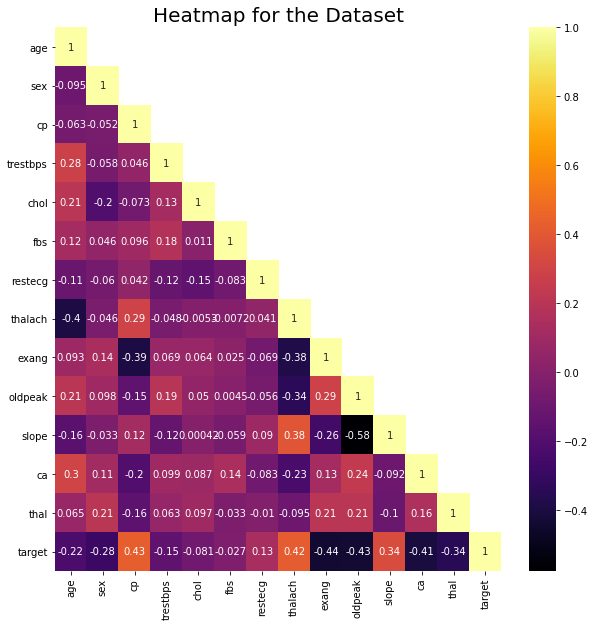

In [ ]:
# Lets plot a correlation matrix and see if we can derive any strong corelation from there

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

The above Heat Map shows that almost all of the features/attributes given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

In [ ]:
countofnodis = len(data[data['target'] == 0])
countofdis = len(data[data['target'] == 1])

print("percent of people with no heart diseaea = {:2f}".format(countofnodis/len(data['target'])*100))
print("percent of people with no heart diseaea = {:2f}".format(countofdis/len(data['target'])*100))


percent of people with no heart diseaea = 45.695364
percent of people with no heart diseaea = 54.304636


## 2. VISUALIZING NUMERICAL DATA

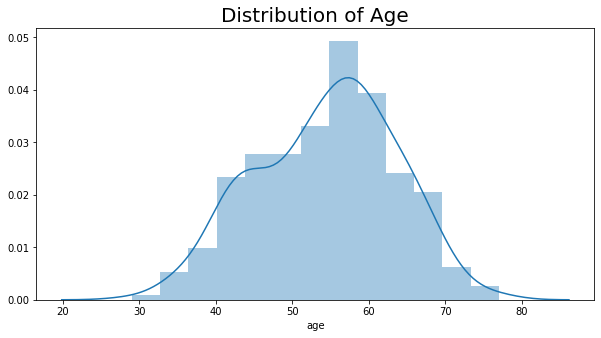

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,5)
sns.distplot(data['age'])
plt.title('Distribution of Age', fontsize = 20)
plt.show()

The above Distribution plot shows the distribution of Age amongst all of the entries in the dataset about the heart patients. The Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.

In [ ]:
pd.crosstab(data.age,data.target) #gives us a frequency table

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,1
39,1,3
40,2,1
41,1,9
42,1,7


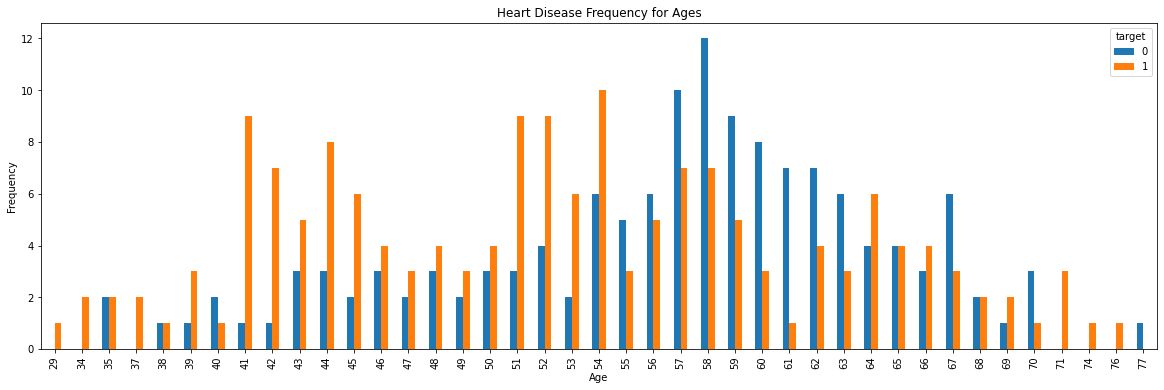

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

A much more detailed view of the above distribution

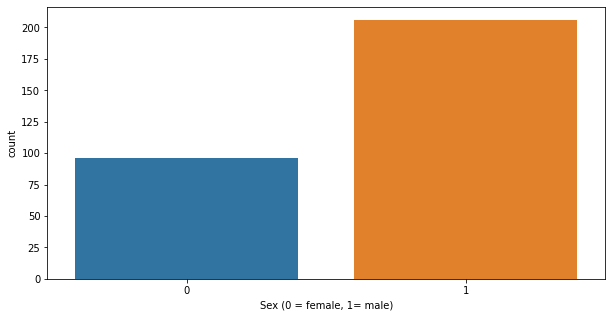

In [ ]:

sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

we see that no. of males is double that of females, meaning more no. of males took part in the study


In [ ]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))


Percentage of Female Patients: 31.79%
Percentage of Male Patients: 68.21%


this can be because of double the no. of males taking part in the study

<Figure size 720x432 with 0 Axes>

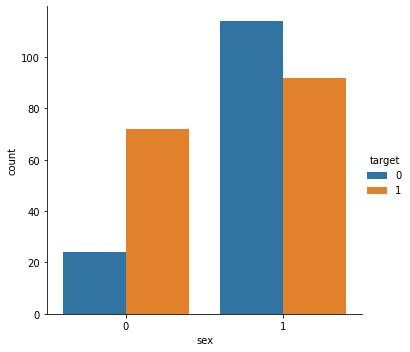

In [ ]:
plt.figure(figsize = (10, 6))
sns.catplot(x = 'sex', hue = 'target',kind="count", data = data)
plt.show()


In [ ]:
 data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


numerical variables: age, trestbps, chol, thalach, odlpeak

Out of this numerical variables chol,thalach and oldpeak have significant differences in the mean value for patients vs non- patients so lets analyze them

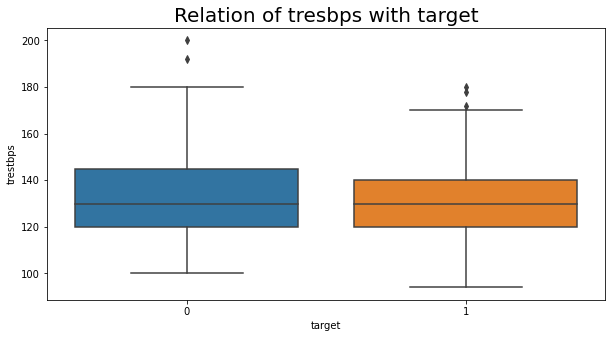

In [ ]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (10,5)
sns.boxplot(data['target'],data['trestbps'])
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()



The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

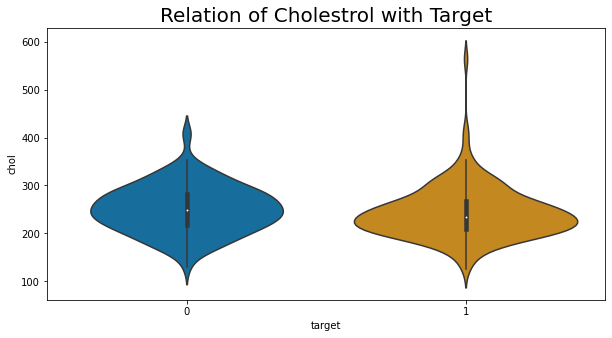

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

The above plot between cholestrol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.

Hence, we can infer from the above plot that the cholestrol levels plays an important role in determining heart diseases.



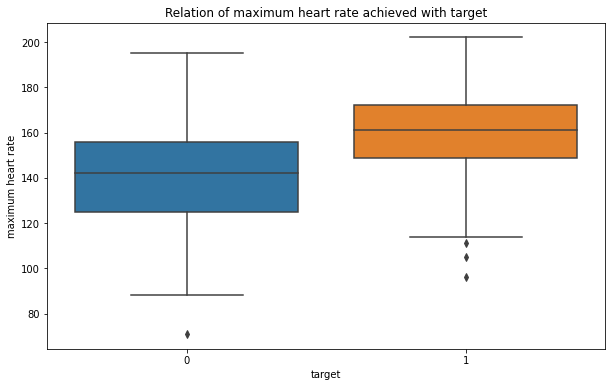

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data["target"],data["thalach"])
plt.title("Relation of maximum heart rate achieved with target")
plt.ylabel("maximum heart rate")
plt.show()


maximum heart rate achieved for patients of heart disease is clearly more than maximum heart rate for non-patients so it will be a good dependent variable.


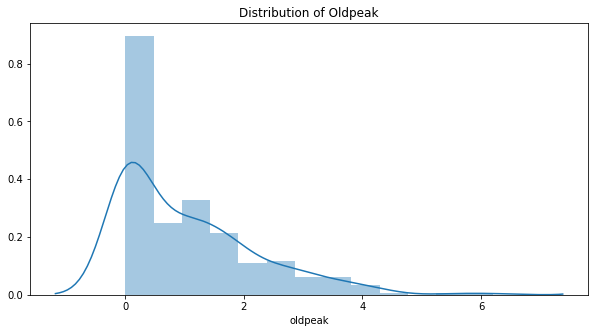

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
sns.distplot(data['oldpeak'])
plt.title('Distribution of Oldpeak', fontsize = 12)
plt.show()

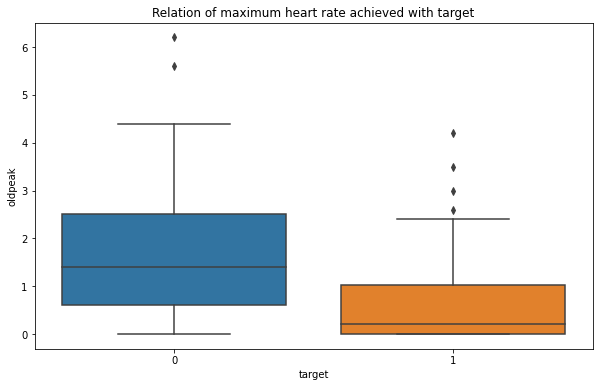

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data["target"],data["oldpeak"])
plt.title("Relation of maximum heart rate achieved with target")
plt.show()

People with heart disease have lower old peak than that with no heart disease 

## 3. VISUALIZING CATEGORICAL DATA

<Figure size 720x432 with 0 Axes>

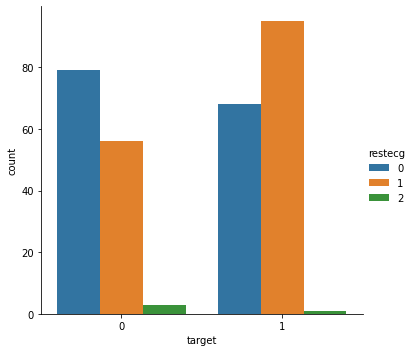

In [ ]:
# Resting electrocardiographic measurement vs target

plt.figure(figsize = (10, 6))
sns.catplot(x = 'target', hue = 'restecg',kind="count", data = data)
plt.show()

The above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.

<Figure size 720x432 with 0 Axes>

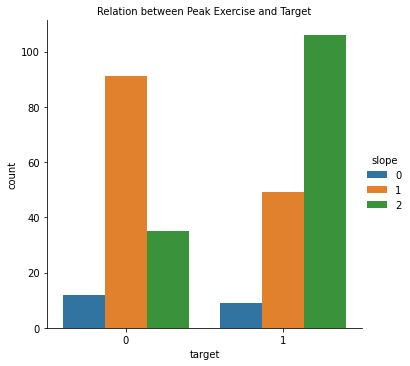

In [ ]:
# Peak Exercise(slope) measurement vs target
plt.figure(figsize = (10, 6))
sns.catplot(x = 'target', hue = 'slope',kind="count", data = data)
plt.title('Relation between Peak Exercise and Target', fontsize = 10)
plt.show()

slope = {Up(0), flat(1), down(2)}

This plot clearly shows that the patients who are not likely to suffer from any heart diseases are mostly having value 1 means upsloping, whereas very few people suffering from heart diseases have upsloping pattern in exercises. Also, Flat Exercises are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

<Figure size 720x432 with 0 Axes>

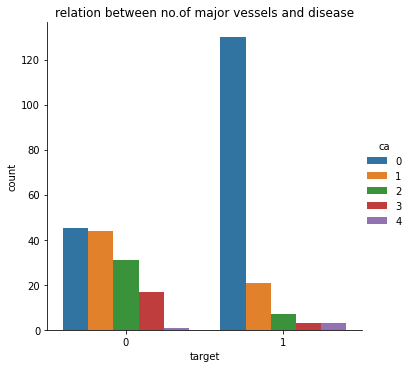

In [ ]:
# no.of major vessels(ca) vs target

plt.figure(figsize = (10, 6))
sns.catplot(x = 'target', hue = 'ca',kind="count", data = data)
plt.title("relation between no.of major vessels and disease")
plt.show()

from the above graph, we can see that ca parameter = 0 for most of the peope suffering fom heart disease so it can be a good classifier

<Figure size 720x432 with 0 Axes>

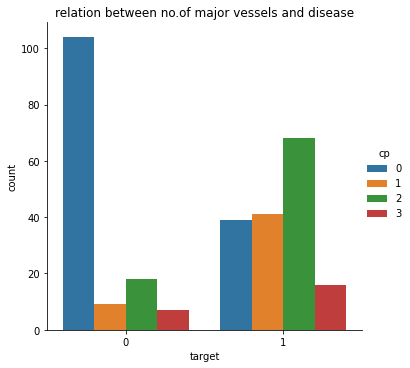

In [ ]:
# no.of major vessels(ca) vs target

plt.figure(figsize = (10, 6))
sns.catplot(x = 'target', hue = 'cp',kind="count", data = data)
plt.title("relation between no.of major vessels and disease")
plt.show()

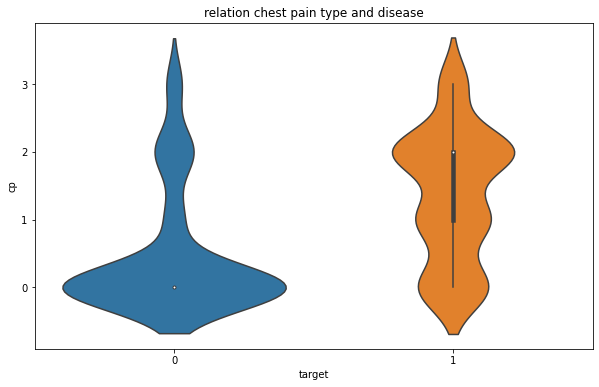

In [ ]:
plt.figure(figsize = (10, 6))
sns.violinplot(data["target"],data["cp"])
plt.title("relation chest pain type and disease")
plt.show()


We see from the above two graphs that most of the people with type 0 chest pain are not patients whereas most of the people with type 2 and type 3 chestpain are patients

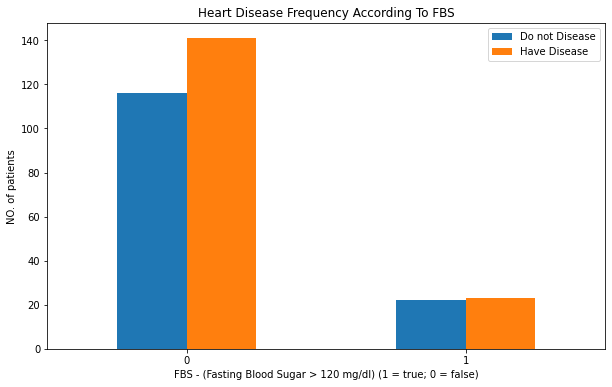

In [ ]:
# fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Do not Disease", "Have Disease"])
plt.ylabel('NO. of patients')
plt.show()


from the above graph, we can see that fbs does not give a good measure of classification

<Figure size 720x432 with 0 Axes>

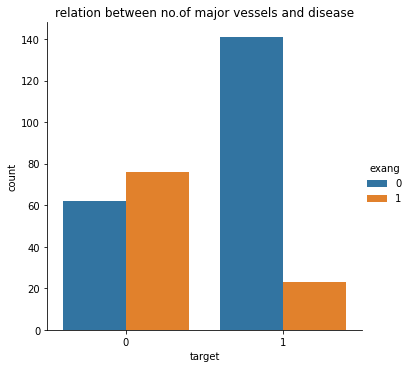

In [ ]:
# exercise induced angina (0 - No, 1 - Yes)

plt.figure(figsize = (10, 6))
sns.catplot(x = 'target', hue = 'exang',kind="count", data = data)
plt.title("relation between no.of major vessels and disease")
plt.show()

In [ ]:
data[data["thal"] == 0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


<Figure size 720x432 with 0 Axes>

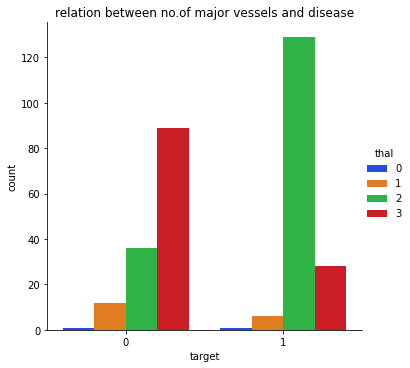

In [ ]:
# thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
plt.figure(figsize = (10, 6))
sns.catplot(x = 'target', hue = 'thal',kind ="count", data = data, palette = "bright")
plt.title("relation between no.of major vessels and disease")
plt.show()

In the above plot between Target and a Blood disorder called Thalessemia, It can be easily inferred that the patients suffering from heart diseases have low chances of also suffering from thalessemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, It is also a good feature to classify heart diseases.

# ***LOGISTIC REGRESSION FROM SCRATCH***

***using gradient descent algorithm to minimize loss function***

## 1.PREPARING THE DATA

ENCODING CATEGORICAL VARIABLES:

Out of all the categorical variables, we only need to encode 'cp', 'thal' and 'slope' as rest are present in binary format(0 or 1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.4 KB


In [ ]:
data['cp'] = data["cp"].astype('object')
data['thal'] = data["thal"].astype('object')
data['slope'] = data["slope"].astype('object')

In [ ]:
data = pd.get_dummies(data,drop_first = True)

In [ ]:
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,1,0


In [ ]:
new_data = data

In [ ]:
# splitting the data into x and y 

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
new_data = new_data.drop('target', axis = 1)
print(x.shape,y.shape)

(302, 18) (302,)


In [ ]:
# Normalize
#x = (x - np.min(x)) / (np.max(x) - np.min(x))


In [ ]:
# splitting the data into test set and train set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(x_train[1])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train[:,[0,2,3,6]] = sc.fit_transform(x_train[:,[0,2,3,6]])
x_test[:,[0,2,3,6]] = sc.transform(x_test[:,[0,2,3,6]])
print(x_train[1])

(241, 18) (241,) (61, 18) (61,)
[ 66.   0. 146. 278.   0.   0. 152.   0.   0.   1.   1.   0.   1.   0.
   1.   0.   0.   1.]
[1.25925059 0.         0.81698091 0.59425361 0.         0.
 0.10822916 0.         0.         1.         1.         0.
 1.         0.         1.         0.         0.         1.        ]


In [ ]:
# reshaping the y variable

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
print(y_train.shape,y_test.shape)

(241, 1) (61, 1)


In [ ]:
# adding the bias variable

x_new = np.concatenate((np.ones((len(x_train),1),dtype = int),x_train),axis = 1)
x_new[1]

array([1.        , 1.25925059, 0.        , 0.81698091, 0.59425361,
       0.        , 0.        , 0.10822916, 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        ])

## 2. MODEL

In [ ]:
import math
def sigmoid(x,theta):
     return 1 / (1 + np.exp(-np.matmul(x,theta)))

In [ ]:
def costfunc(h,y,m):
    #return (-y * np.log(h) - ((1 - y) * np.log(1 - h))).mean()

    J = (-1/m)*(np.sum((y * np.log(h)) + ((1 - y) * (np.log(1 - h)))) )

    return J

In [ ]:
def gradient_descent(alpha,x, h,y,m,theta):
    # return np.matmul(x.T, (h - y)) / m

    theta = theta - ((alpha/m) * (np.matmul((h - y).T, x))).T
    return theta

In [ ]:
# def update_theta_loss(theta, learning_rate, gradient):
#     return theta - learning_rate * gradient

In [ ]:
def logistic_regression():

  alpha = 0.03
  epochs = 5000
  m = len(x_new)
  
  # weights initialization
  #
  theta = np.full((x_new.shape[1],1),0.01)
  #theta = np.zeros((x_new.shape[1], 1),dtype=float)
  #theta = np.random.normal(size=(x_new.shape[1],1))

  cost = []
  for i in range(epochs):

    h = sigmoid(x_new,theta)
   
    j = costfunc(h,y_train,m)
    cost.append(j)
    
    theta = gradient_descent(alpha,x_new,h,y_train,m,theta)
    # grad = gradient_descent(x_train,h,y_train)
    # theta = update_theta_loss(theta,alpha,grad)

  #Plotting cost function vs epochs
  plt.plot(list(range(epochs)), cost)
  plt.title("Cost function vs epochs")
  plt.xlabel("epochs")
  plt.ylabel("J - cost function")
  plt.show()
  print(cost)
  return theta


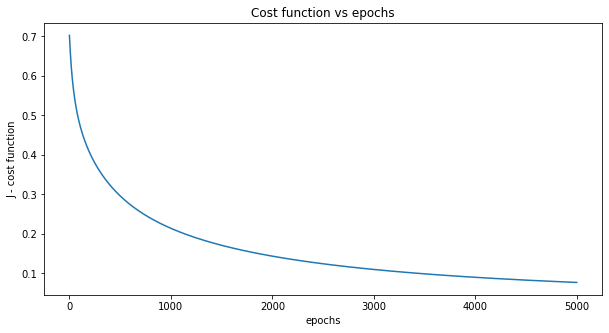

[0.7027753051806146, 0.6971423907984041, 0.6916948350772939, 0.6864236907034699, 0.6813204925977593, 0.6763772345502581, 0.6715863463261468, 0.666940671346039, 0.662433445023095, 0.658058273820444, 0.6538091150761093, 0.6496802576284002, 0.6456663032624786, 0.6417621489883456, 0.6379629701516424, 0.6342642043712682, 0.6306615362917072, 0.6271508831329978, 0.6237283810173173, 0.6203903720480612, 0.617133392114971, 0.6139541593971791, 0.6108495635349157, 0.6078166554399542, 0.6048526377146228, 0.6019548556492526, 0.599120788768277, 0.596348042895731, 0.5936343427116244, 0.5909775247715122, 0.5883755309625393, 0.5858264023702665, 0.5833282735316596, 0.5808793670507377, 0.5784779885544895, 0.5761225219678064, 0.5738114250872753, 0.571543225434784, 0.5693165163729509, 0.5671299534654282, 0.5649822510661326, 0.5628721791224102, 0.560798560178072, 0.558760266563109, 0.5567562177577323, 0.5547853779191804, 0.5528467535604803, 0.5509393913710672, 0.5490623761698248, 0.547214828981751, 0.5453959

In [ ]:
theta = logistic_regression()

[[0.924468  ]
 [0.89984744]
 [0.95778476]
 [0.92368725]
 [0.94201151]
 [0.93159766]
 [0.92424379]
 [0.81600476]
 [0.94822921]
 [0.94069379]
 [0.77252919]
 [0.00843267]
 [0.87662439]
 [0.03375694]
 [0.00771424]
 [0.02420008]
 [0.81341711]
 [0.01714175]
 [0.34785835]
 [0.68057056]
 [0.02388549]
 [0.86418428]
 [0.89886633]
 [0.03965881]
 [0.01850539]
 [0.94154053]
 [0.93332298]
 [0.08795153]
 [0.00589753]
 [0.03310115]
 [0.95194132]
 [0.95936413]
 [0.00945142]
 [0.7893919 ]
 [0.01827775]
 [0.38485252]
 [0.02662403]
 [0.02515385]
 [0.71825727]
 [0.93591664]
 [0.1994471 ]
 [0.00963529]
 [0.05552044]
 [0.94511428]
 [0.02350138]
 [0.03125391]
 [0.01826044]
 [0.81373026]
 [0.61238276]
 [0.88161995]
 [0.03920561]
 [0.01288853]
 [0.00643745]
 [0.15653967]
 [0.00439293]
 [0.94363911]
 [0.00744097]
 [0.01733183]
 [0.01492936]
 [0.00940401]
 [0.00472618]]
(61, 1)
Manual Test Accuracy: 95.08%


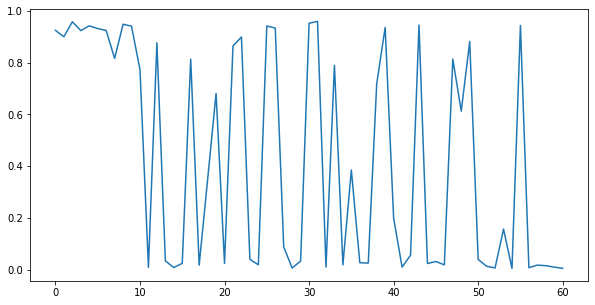

In [ ]:
#adding bias variable
xtest_new = np.concatenate((np.ones((len(x_test), 1), dtype=int), x_test), axis=1)

def predict(theta,x_test):
    y_head = 1 / (1 + np.exp(-np.matmul(x_test,theta)))
    print(y_head)
    y_prediction = np.zeros((x_test.shape[0],1))
  
    
    for i in range(y_head.shape[0]):
        if y_head[i,0] <= 0.3:
            y_prediction[i,0] = 0
        else:
            y_prediction[i,0] = 1
        
    plt.plot(y_head)
    print(y_prediction.shape)
    return y_prediction

  
y_prediction = predict(theta,xtest_new)
# print(y_prediction)
print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))



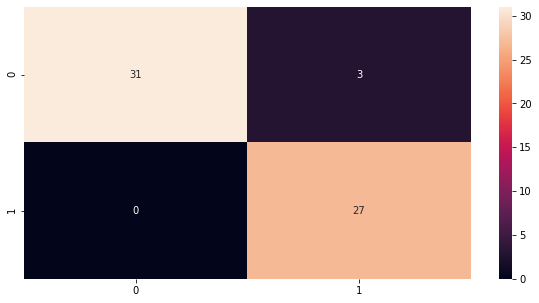

In [ ]:
#Confusion matrix visualized:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_prediction)

sns.heatmap(cf_matrix, annot=True)

In [ ]:
#Metrics based result
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.90      1.00      0.95        27

    accuracy                           0.95        61
   macro avg       0.95      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61



# ***LOGISTIC REGRESSION USING SKLEARN***

In [ ]:
new_data2 = data

# splitting the data into x and y 
x = new_data2.iloc[:,:-1].values
y = new_data2.iloc[:,-1].values
new_data2 = new_data2.drop('target', axis = 1)
print(x.shape,y.shape)

#Normalize
# x = (x - np.min(x)) / (np.max(x) - np.min(x))
 
# splitting the data into test set and train set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(302, 18) (302,)
(241, 18) (241,) (61, 18) (61,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 96.72%


In [ ]:
#Confusion matrix visualized:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True)

NameError: ignored

# ***LOGISTIC REGRESSION USING LOG LIKELIHOOD CONCEPT***


In [ ]:
def loglikelihood(y,pi):

  ll=1
  ll_unit = list(range(1,len(y)+1))
  
  for i in range(len(y)):
    ll_unit[i] = np.where(y[i]==1,pi[i],(1-pi[i]))
    ll=ll*ll_unit[i]
  
  return ll



In [ ]:
#Calculate the first derivative of likelihood function given output (y) , input (x) and pi (estimated probability)

def calculatefirstder(y,x,pi):
  derv - y*x - pi*x
  derv_sum = sum(derv)

  return derv_sum


In [ ]:
#Calculate the value of pi (predictions on each observation) given x_new(input) and estimated betas

# P = odds/ 1 + odds
# and logs(odds) = bo*xo + b1*x1 + b2*x2.....
# therefore P = exp(log(odds)) / 1 + exp(log(odds))
#            = exp(bo*xo + b1*x1 + b2*x2) / 1 + exp(bo*xo + b1*x1 + b2*x2)

# which is what we are doing in the below func

def logitprob(x,theta):

  rows=np.shape(x)[0]
  cols=np.shape(x)[1]
  pi=range(1,rows+1)
  expon=range(1,rows+1)
  for i in range(rows):
      expon[i]=0
      for j in range(cols):             # bo*xo + b1*x1 + b2*x2....... for each training example
          ex = x[i][j]*theta[j]          
          expon[i] = ex + expon[i]      # expon[i] stores bo*xo + b1*x1 + b2*x2....... for each training example
     
      with np.errstate(divide='ignore',invalid= 'ignore'):
        pi[i]=np.exp(expon[i])/(1+np.exp(expon[i]))
  return pi

In [ ]:
# Step 3: Calculate the W diagonal matrix
def findW(pi):

  W=np.zeros(len(pi)*len(pi)).reshape(len(pi),len(pi))
  for i in range(len(pi)):
    print(i)
    W[i,i]=pi[i]*(1-pi[i])
    W[i,i].astype(float)
  return W

In [ ]:
# Step 4: defining the logistic function
  from numpy import linalg
def logistic(X,Y,limit):
  nrow=np.shape(X)[0]
  bias=np.ones(nrow).reshape(nrow,1)
  X_new=np.append(X,bias,axis=1)
  ncol=np.shape(X_new)[1]
  beta=np.zeros(ncol).reshape(ncol,1)
  root_diff=np.array(range(1,ncol+1)).reshape(ncol,1)
  iter_i=10000
  
  while(iter_i>limit):
    print iter_i, limit
    pi=logitprob(X_new,beta)
    print pi
    W=findW(pi)
    print W
    print X_new
    print (Y-np.transpose(pi))
    print np.array((linalg.inv(np.matrix(np.transpose(X_new))*np.matrix(W)*np.matrix(X_new)))*(np.transpose(np.matrix(X_new))*np.matrix(Y-np.transpose(pi)).transpose()))
    print beta
    print type(np.matrix(np.transpose(Y-np.transpose(pi))))
    print np.matrix(Y-np.transpose(pi)).transpose().shape
    print np.matrix(np.transpose(X_new)).shape
    root_diff=np.array((linalg.inv(np.matrix(np.transpose(X_new))*np.matrix(W)*np.matrix(X_new)))*(np.transpose(np.matrix(X_new))*np.matrix(Y-np.transpose(pi)).transpose()))
    beta=beta+root_diff
    iter_i=np.sum(root_diff*root_diff)
    ll=likelihood(Y,pi)

return beta